In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline

# LOADING THE DATASET

In [2]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width to avoid wrapping
df.head()

VendorNumber                VendorName  Brand              Description  PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  StockTurnover  SalesToPurchaseRatio  SalesContributionPercent  VendorRanking
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black          26.27        36.99  1750.0                 145080            3811251.60              9578.0          344712.22         64889.97        17598.14     68601.68  -3466539.38  -1005.632867       0.066019              0.090446                  1.043491         4344.0
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka          23.19        28.99  1750.0                 164038            3804041.22              9203.0          275162.97         52289.50        16909.12    144929.24  -3528878.25  -1282.468440       0.056103              0.072334                  0.832956         5247.0
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof          18.24        24.99  1750.0                 187407            3418303.68             11189.0          288135.11         48202.30        20557.97    123780.22  -3130168.57  -1086.354443       0.059704              0.084292                  0.872224         4734.0
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum          16.17        22.99  1750.0                 201682            3261197.94             20226.0          444810.74         43304.31        37163.76    257032.07  -2816387.20   -633.165287       0.100287              0.136395                  1.346503         2946.0
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka          21.89        29.99  1750.0                 138109            3023206.01             11883.0          357759.17         52774.51        21833.58    257032.07  -2665446.84   -745.039419       0.086041              0.118338                  1.082986         3402.0

# EXPLORATORY DATA ANALYSIS

In [3]:
#summary statistics
df.describe().T

count          mean            std         min         25%           50%           75%           max
VendorNumber              10692.0  1.065065e+04   18753.519148        2.00   3951.0000   7153.000000   9552.000000  2.013590e+05
Brand                     10692.0  1.803923e+04   12662.187074       58.00   5793.5000  18761.500000  25514.250000  9.063100e+04
PurchasePrice             10692.0  2.438530e+01     109.269375        0.36      6.8400     10.455000     19.482500  5.681810e+03
ActualPrice               10692.0  3.564367e+01     148.246016        0.49     10.9900     15.990000     28.990000  7.499990e+03
Volume                    10692.0  8.473605e+02     664.309212       50.00    750.0000    750.000000    750.000000  2.000000e+04
TotalPurchaseQuantity     10692.0  3.140887e+03   11095.086769        1.00     36.0000    262.000000   1975.750000  3.376600e+05
TotalPurchaseDollars      10692.0  3.010669e+04  123067.799627        0.71    453.4575   3655.465000  20738.245000  3.811252e+06
TotalSalesQuantity        10692.0  2.288879e+02     871.127723        0.00      0.0000     12.000000    129.250000  2.854400e+04
TotalSalesDollars         10692.0  3.089648e+03   12181.138259        0.00      0.0000    251.740000   2089.552500  4.448107e+05
TotalSalesPrice           10692.0  1.508301e+03    3902.425486        0.00      0.0000    125.980000   1220.622500  6.488997e+04
TotalExciseTax            10692.0  1.300225e+02     847.917918        0.00      0.0000      1.990000     27.600000  3.716376e+04
FreightCost               10692.0  6.143376e+04   60938.458032        0.09  14069.8700  50293.620000  79528.990000  2.570321e+05
GrossProfit               10692.0 -2.701705e+04  111707.136431 -3528878.25 -18548.7650  -3179.925000   -330.307500  1.286589e+04
ProfitMargin              10692.0          -inf            NaN        -inf         NaN  -1038.787468   -520.864211  9.923747e+01
StockTurnover             10692.0  2.965042e-01       1.992574        0.00      0.0000      0.056838      0.105531  1.020000e+02
SalesToPurchaseRatio      10692.0  4.315030e-01       2.776484        0.00      0.0000      0.087813      0.161066  1.311429e+02
SalesContributionPercent  10692.0  9.352787e-03       0.036874        0.00      0.0000      0.000762      0.006325  1.346503e+00
VendorRanking             10692.0  4.240906e+03    2263.029700        1.00   2361.7500   4473.500000   6028.250000  8.311000e+03

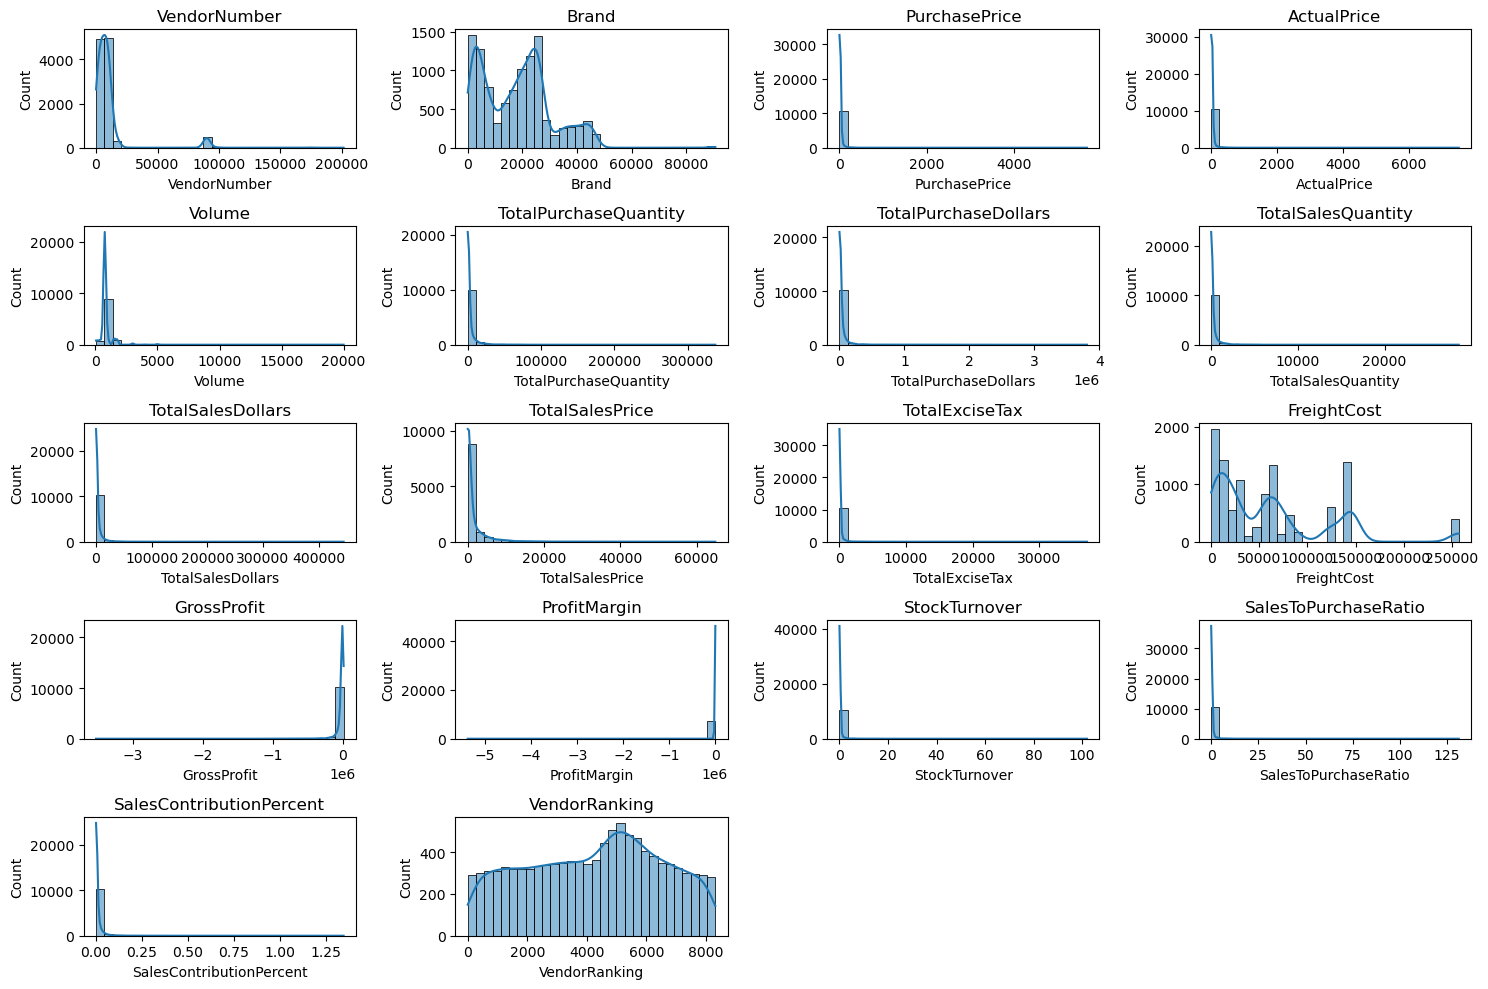

In [4]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()
#or we can use this code- 
#num_plots = len(numerical_cols)
#n_cols = 4  # Or whatever fixed number you prefer
#n_rows = math.ceil(num_plots / n_cols)
#plt.figure(figsize=(15, 4 * n_rows))
#for i, col in enumerate(numerical_cols):
#    plt.subplot(n_rows, n_cols, i+1)
#    sns.histplot(df[col], kde=True, bins=30)
#    plt.title(col)
#plt.tight_layout()
#plt.show()


From the above plot we get to know that there are many outliers for ex. in purchaseprices

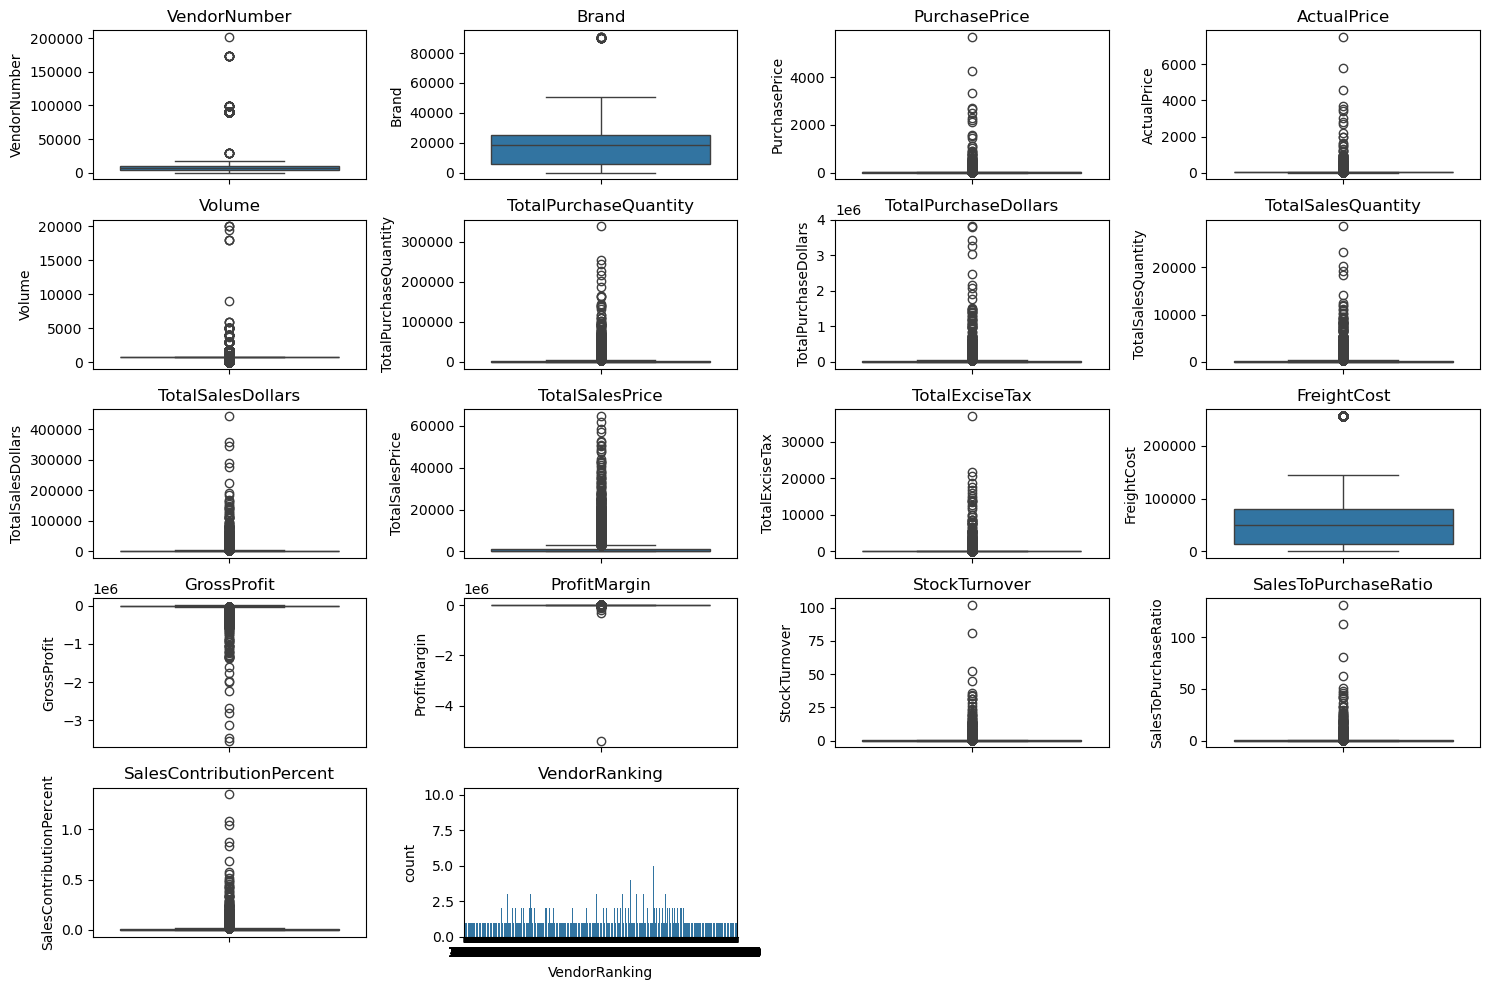

In [5]:
#outlier detection using boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    if col == "VendorRanking":
        sns.countplot(x=df[col])
        plt.xlabel(col)
    else:
        sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:

Negative & Zero Values:
- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.

In [6]:
#filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [7]:
df

VendorNumber                  VendorName  Brand                   Description  PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  StockTurnover  SalesToPurchaseRatio  SalesContributionPercent  VendorRanking
0           10754              PERFECTA WINES  25197  Ch La Rousseliere St Estephe          99.33       149.99   750.0                    250              24832.50               198.0           29698.02          1199.92           22.24     28720.52      4865.52     16.383314       0.792000              1.195934                  0.089900           10.0
1            9552              M S WALKER INC  23355        Paul Dolan 12 Cab Svgn           9.60        14.49   750.0                   1486              14265.60              1151.0           17253.49          5381.41          128.82     55551.82      2987.89     17.317598       0.774563              1.209447                  0.052229           17.0
2             480             BACARDI USA INC   4881    Bacardi Twin Pack 2/750mls          14.81        19.99   750.0                    846              12529.26               867.0           17331.33          7196.40          683.00     89286.27      4802.07     27.707452       1.024823              1.383268                  0.052464           13.0
3            9165  ULTRA BEVERAGE COMPANY LLP  24379      Madison's Ranch Cab Svgn           8.78        12.99   750.0                   1359              11932.02              1909.0           24797.91          6105.30          214.06     68054.70     12865.89     51.882961       1.404709              2.078266                  0.075067            1.0
4            9552              M S WALKER INC  45604   Latour 12 Cuvee Bourg Rouge          13.07        19.99   750.0                    830              10848.10               614.0           12273.86          5037.48           68.49     55551.82      1425.76     11.616232       0.739759              1.131429                  0.037155           24.0
..            ...                         ...    ...                           ...            ...          ...     ...                    ...                   ...                 ...                ...              ...             ...          ...          ...           ...            ...                   ...                       ...            ...
676          3960    DIAGEO NORTH AMERICA INC   2626             Crown Royal Apple           1.42         1.99    50.0                      2                  2.84                12.0              23.88             1.99            0.63    257032.07        21.04     88.107203       6.000000              8.408451                  0.000072          558.0
677          9815              WINE GROUP INC   8527   Concannon Glen Ellen Wh Zin           1.32         4.99   750.0                      2                  2.64                 3.0               5.97             5.97            0.33     27100.41         3.33     55.778894       1.500000              2.261364                  0.000018          673.0
678          8004              SAZERAC CO INC   5683   Dr McGillicuddy's Apple Pie           0.39         0.49    50.0                      6                  2.34               128.0              62.72             0.98            6.72     50293.62        60.38     96.269133      21.333333             26.803419                  0.000190          487.0
679          3960    DIAGEO NORTH AMERICA INC   6127   The Club Strawbry Margarita           1.47         1.99   200.0                      1                  1.47                 6.0              11.94             7.96            1.26    257032.07        10.47     87.688442       6.000000              8.122449                  0.000036          578.0
680          7245        PROXIMO SPIRITS INC.   3065      Three Olives Grape Vodka           0.71         0.99 

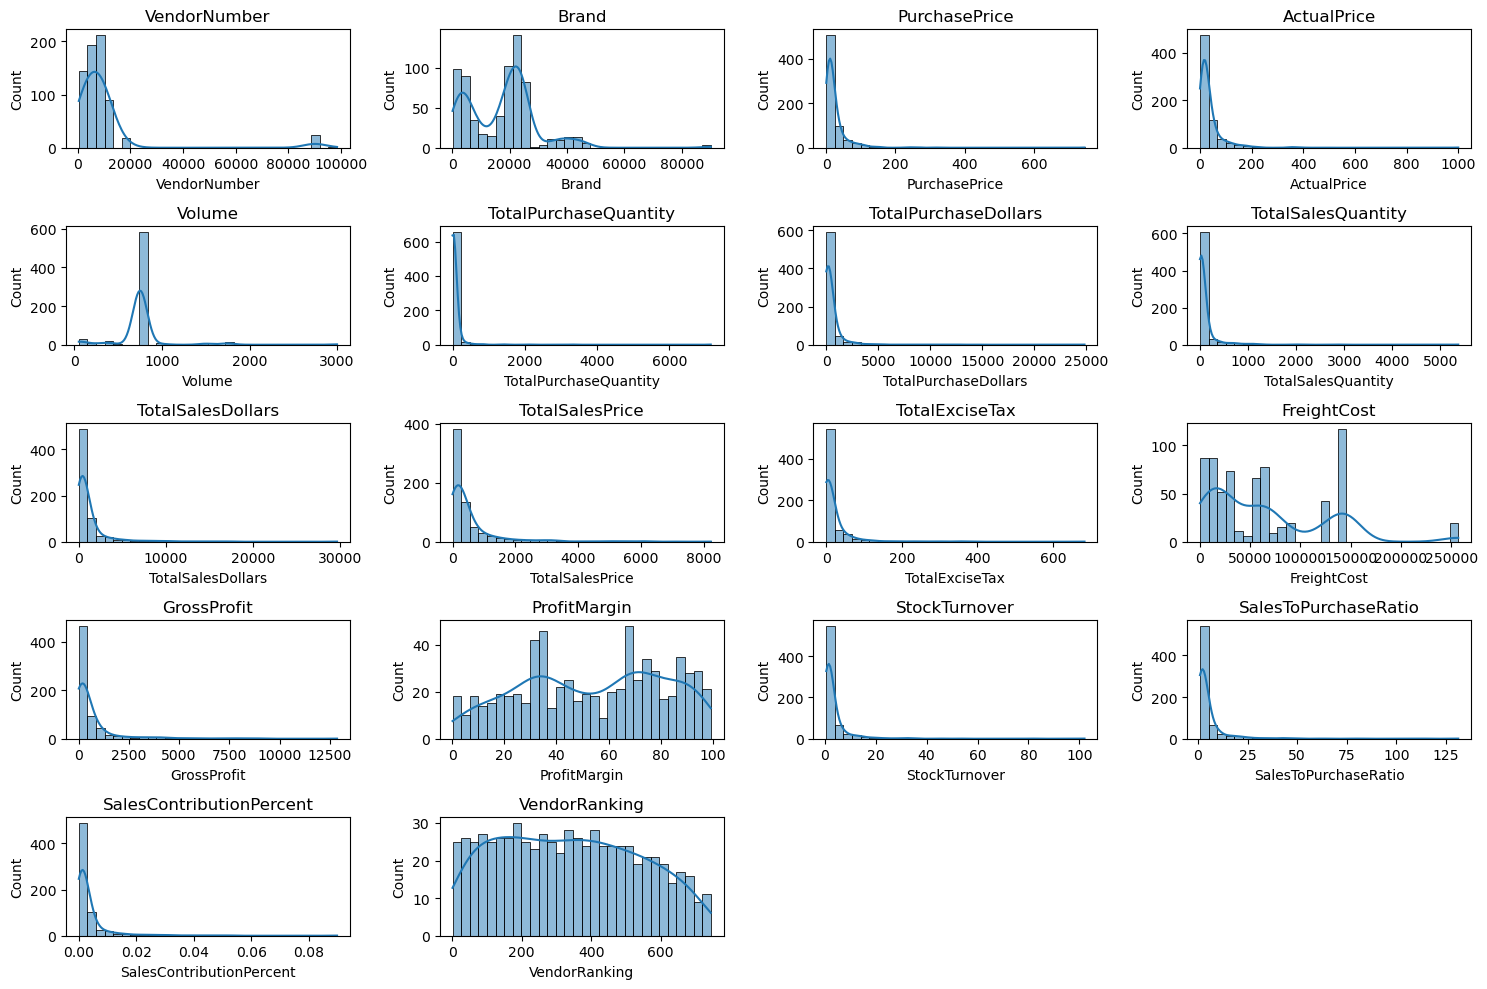

In [8]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

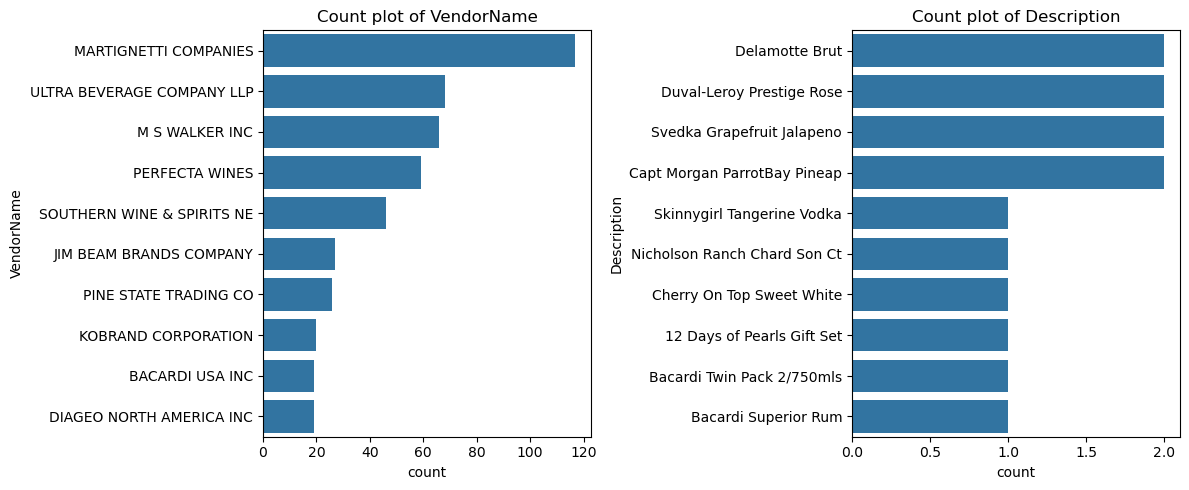

In [9]:
#Let's see which product and vendor's data is mostly present by plotting a countplot
#Count plots for categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

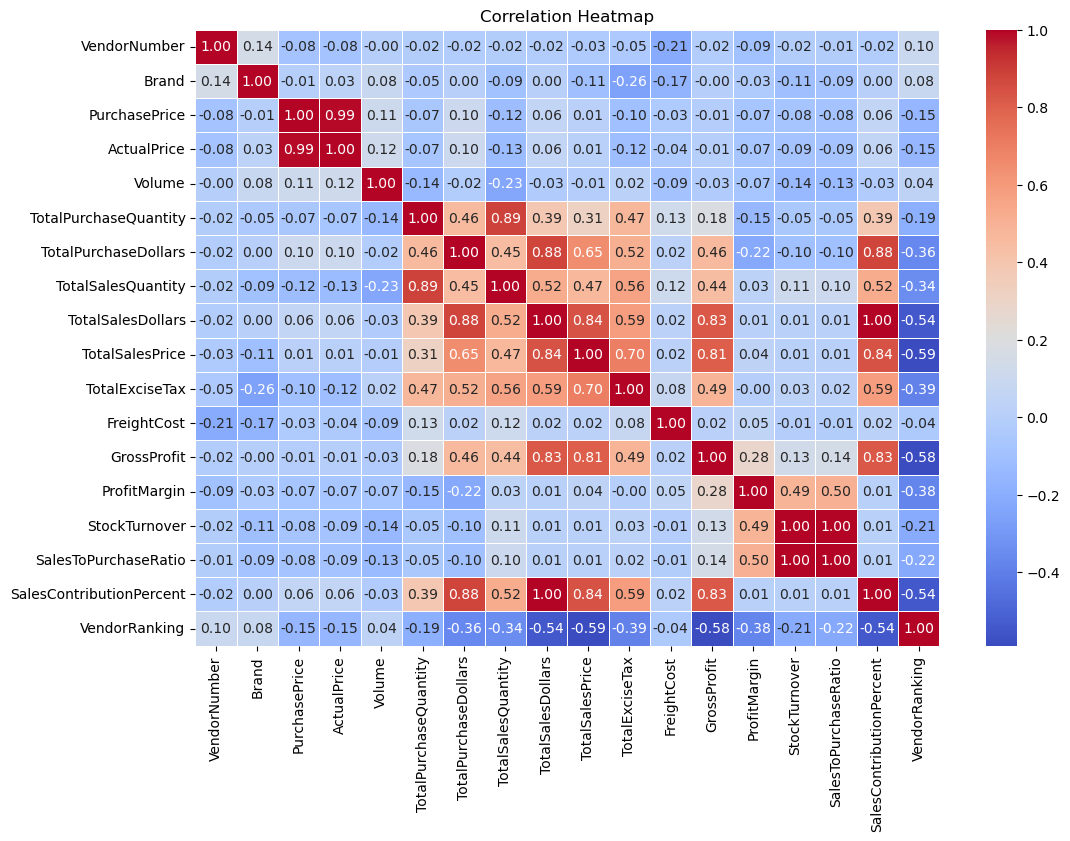

In [10]:
#Relation between these numerical values
#plotting Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights

VendorRanking vs GrossProfit:
Weak negative correlation (-0.04). While there is a slight tendency for higher-ranked vendors to deliver more profit, it’s not strong. Sales revenue from top vendors does not always translate into higher gross profit, so profitability analysis should be done separately.

Strong correlation between total purchase quantity and total sales quantity (0.89), confirming efficient inventory turnover. Bulk purchases from a vendor tend to sell quickly, reducing the risk of excess inventory.)
TotalPurchaseDollars vs SalesContributionPercent:
Strong positive correlation (0.88). Vendors you spend more on purchasing from tend to contribute more to sales. Investment in top vendors generally pays off in terms of sales contribution.

TotalSalesPrice vs ProfitMargin:
Moderate negative correlation (-0.59). As sales price increases, profit margin tends to decrease.
Higher-priced goods from vendors may face competitive pressures, leading to lower margins. Assess pricing strategies carefully for high-priced products.

StockTurnover vs GrossProfit:
Weak negative correlation (-0.04). Fast-moving inventory doesn’t necessarily produce higher gross profit.
High stock turnover indicates product movement, but profitability depends on pricing and cost, making it important to look beyond movement metrics.

# DATA ANALYSIS
# Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [11]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15) # Total sales lower threshold should be less than 15%
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85) #Profit margin higher than 85%

In [13]:
low_sales_threshold

np.float64(119.832)

In [14]:
high_margin_threshold

np.float64(87.42082785501476)

In [15]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))
print(target_brands.shape)

Brands with Low Sales but High Profit Margins:


Description  TotalSalesDollars  ProfitMargin
616   The Club Strawbry Margarita              11.94     87.688442
229             Crown Royal Apple              23.88     88.107203
635                  Tracia Syrah              44.94     88.495772
46   Bacardi Oakheart Spiced Trav              59.94     87.554221
256   Dr McGillicuddy's Apple Pie              62.72     96.269133
579  St Elder Elderflower Liqueur              66.33     91.436756
31       Aresti Pnt Nr Curico Vly              74.85     95.617902
239     DeKuyper Buttershots Trav              76.93     90.718835
626      Three Olives Grape Vodka              80.19     99.114603
580            St Germain Liqueur              89.94     87.658439
481             Piehole Apple Pie              98.01     95.592287
431      Mojoshot Blue Lagoon RTD             112.86     91.591352
654         Vigne A Porrona Rosso             116.91     92.592593

(13, 3)


In [16]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']< 10000] #for better visualisation

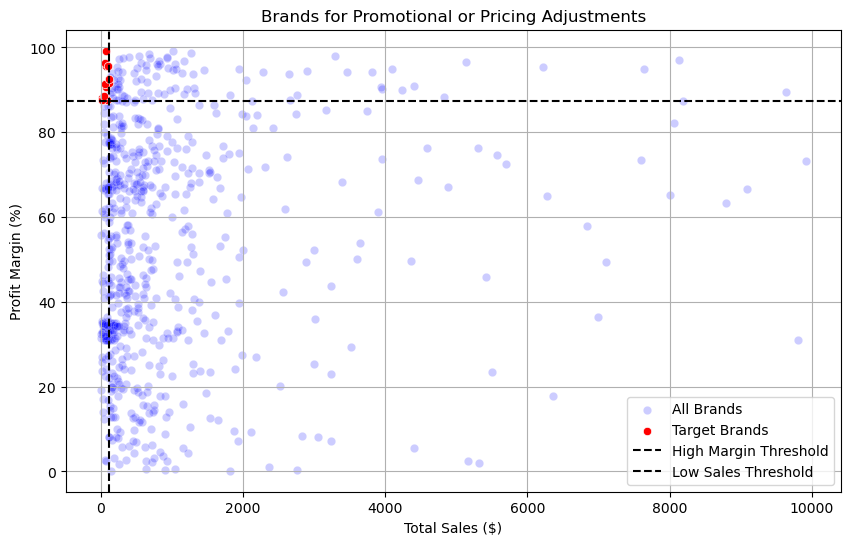

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

# Which vendors and brands demonstrate the highest sales performance

In [18]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [19]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
ULTRA BEVERAGE COMPANY LLP    132226.54
MARTIGNETTI COMPANIES         125884.74
M S WALKER INC                100939.71
PERFECTA WINES                 62686.86
BACARDI USA INC                49095.12
SOUTHERN WINE & SPIRITS NE     48248.55
STATE WINE & SPIRITS           30773.64
JIM BEAM BRANDS COMPANY        28761.34
DIAGEO NORTH AMERICA INC       22506.09
BROWN-FORMAN CORP              20504.19
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Ch La Rousseliere St Estephe    29698.02
Madison's Ranch Cab Svgn        24797.91
Bacardi Twin Pack 2/750mls      17331.33
Paul Dolan 12 Cab Svgn          17253.49
DiSaronna Amaretto Sour VAP     15596.83
Pizzolato Pnt Grigio            14252.61
Robert Hall Cab Svgn            12912.77
Latour 12 Cuvee Bourg Rouge     12273.86
Bacardi Superior Rum            11411.40
Saddleback Clrs 09 Cab Svgn     10447.25
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brands.apply(lambda x : format_dollars(x))

Description
Ch La Rousseliere St Estephe    29.70K
Madison's Ranch Cab Svgn        24.80K
Bacardi Twin Pack 2/750mls      17.33K
Paul Dolan 12 Cab Svgn          17.25K
DiSaronna Amaretto Sour VAP     15.60K
Pizzolato Pnt Grigio            14.25K
Robert Hall Cab Svgn            12.91K
Latour 12 Cuvee Bourg Rouge     12.27K
Bacardi Superior Rum            11.41K
Saddleback Clrs 09 Cab Svgn     10.45K
Name: TotalSalesDollars, dtype: object

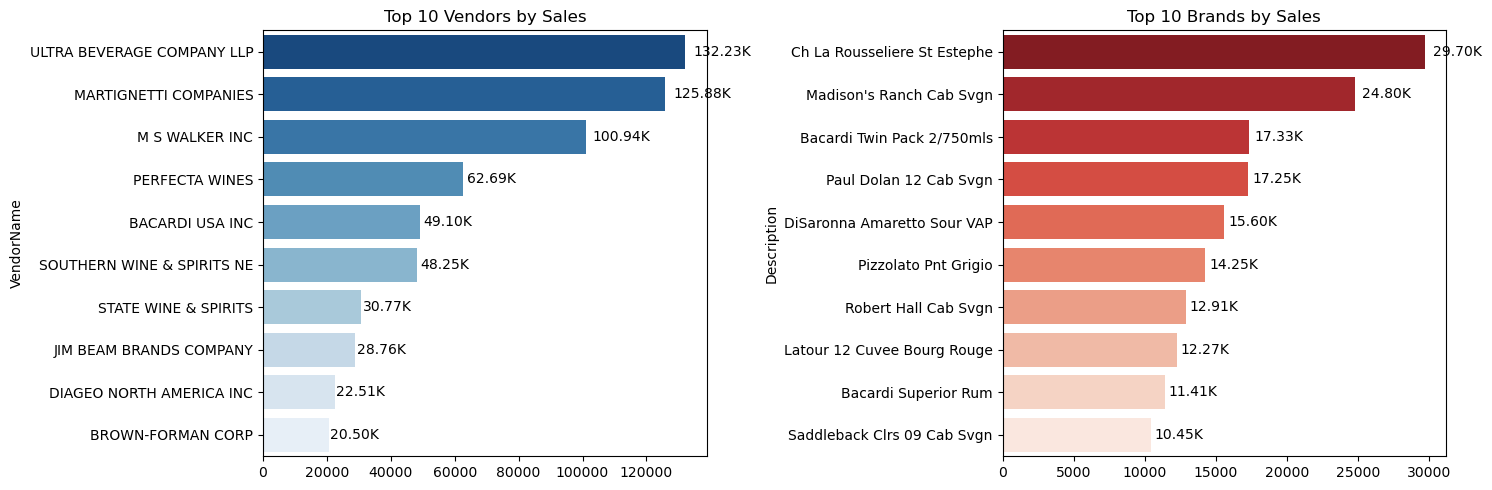

In [22]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Which vendors contribute most to total purchase dollars?

In [23]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(64, 4)

In [24]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [25]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

In [26]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

VendorName TotalPurchaseDollars GrossProfit TotalSalesDollars  PurchaseContribution%
56  ULTRA BEVERAGE COMPANY LLP               51.49K      80.73K           132.23K                  13.54
30       MARTIGNETTI COMPANIES               49.36K      76.53K           125.88K                  12.97
28              M S WALKER INC               48.47K      52.47K           100.94K                  12.74
37              PERFECTA WINES               40.43K      22.26K            62.69K                  10.63
2              BACARDI USA INC               28.83K      20.27K            49.10K                   7.58
47  SOUTHERN WINE & SPIRITS NE               20.94K      27.30K            48.25K                   5.51
24     JIM BEAM BRANDS COMPANY               14.29K      14.47K            28.76K                   3.76
13    DIAGEO NORTH AMERICA INC               14.02K       8.49K            22.51K                   3.69
48        STATE WINE & SPIRITS               11.70K      19.07K            30.77K                   3.08
38           PERNOD RICARD USA               10.76K       9.57K            20.33K                   2.83

In [27]:
top_vendors['PurchaseContribution%'].sum()

np.float64(76.32999999999998)

In [28]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

VendorName TotalPurchaseDollars GrossProfit TotalSalesDollars  PurchaseContribution%  Cumulative_Contribution%
56  ULTRA BEVERAGE COMPANY LLP               51.49K      80.73K           132.23K                  13.54                     13.54
30       MARTIGNETTI COMPANIES               49.36K      76.53K           125.88K                  12.97                     26.51
28              M S WALKER INC               48.47K      52.47K           100.94K                  12.74                     39.25
37              PERFECTA WINES               40.43K      22.26K            62.69K                  10.63                     49.88
2              BACARDI USA INC               28.83K      20.27K            49.10K                   7.58                     57.46
47  SOUTHERN WINE & SPIRITS NE               20.94K      27.30K            48.25K                   5.51                     62.97
24     JIM BEAM BRANDS COMPANY               14.29K      14.47K            28.76K                   3.76                     66.73
13    DIAGEO NORTH AMERICA INC               14.02K       8.49K            22.51K                   3.69                     70.42
48        STATE WINE & SPIRITS               11.70K      19.07K            30.77K                   3.08                     73.50
38           PERNOD RICARD USA               10.76K       9.57K            20.33K                   2.83                     76.33

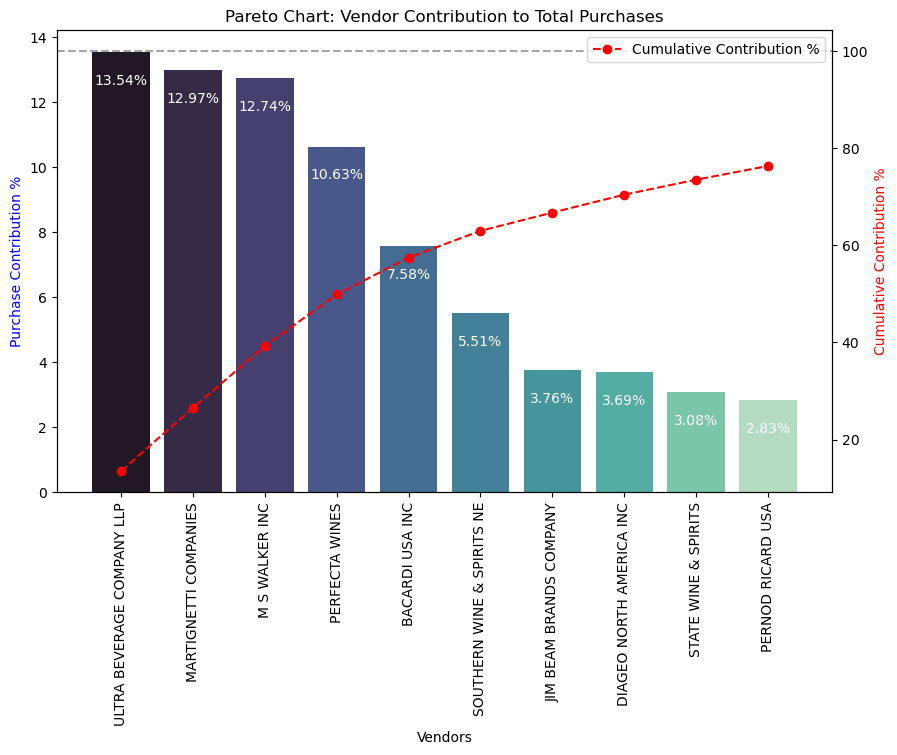

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

# How much of total procurement is dependent on the top vendors?

In [30]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)} %")

Total Purchase Contribution of top 10 vendors is 76.33 %


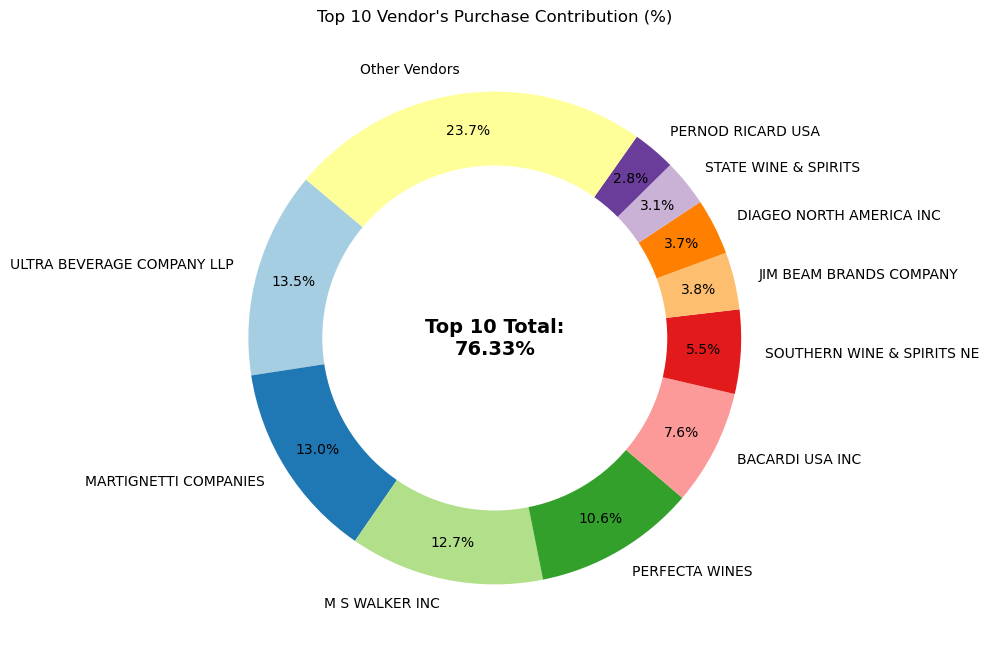

In [31]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

# Does purchasing in bulk reduce the unit price and what is the optimal purchase value for cost saving?

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [33]:
df

VendorNumber                  VendorName  Brand                   Description  PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  StockTurnover  SalesToPurchaseRatio  SalesContributionPercent  VendorRanking  UnitPurchasePrice
0           10754              PERFECTA WINES  25197  Ch La Rousseliere St Estephe          99.33       149.99   750.0                    250              24832.50               198.0           29698.02          1199.92           22.24     28720.52      4865.52     16.383314       0.792000              1.195934                  0.089900           10.0              99.33
1            9552              M S WALKER INC  23355        Paul Dolan 12 Cab Svgn           9.60        14.49   750.0                   1486              14265.60              1151.0           17253.49          5381.41          128.82     55551.82      2987.89     17.317598       0.774563              1.209447                  0.052229           17.0               9.60
2             480             BACARDI USA INC   4881    Bacardi Twin Pack 2/750mls          14.81        19.99   750.0                    846              12529.26               867.0           17331.33          7196.40          683.00     89286.27      4802.07     27.707452       1.024823              1.383268                  0.052464           13.0              14.81
3            9165  ULTRA BEVERAGE COMPANY LLP  24379      Madison's Ranch Cab Svgn           8.78        12.99   750.0                   1359              11932.02              1909.0           24797.91          6105.30          214.06     68054.70     12865.89     51.882961       1.404709              2.078266                  0.075067            1.0               8.78
4            9552              M S WALKER INC  45604   Latour 12 Cuvee Bourg Rouge          13.07        19.99   750.0                    830              10848.10               614.0           12273.86          5037.48           68.49     55551.82      1425.76     11.616232       0.739759              1.131429                  0.037155           24.0              13.07
..            ...                         ...    ...                           ...            ...          ...     ...                    ...                   ...                 ...                ...              ...             ...          ...          ...           ...            ...                   ...                       ...            ...                ...
676          3960    DIAGEO NORTH AMERICA INC   2626             Crown Royal Apple           1.42         1.99    50.0                      2                  2.84                12.0              23.88             1.99            0.63    257032.07        21.04     88.107203       6.000000              8.408451                  0.000072          558.0               1.42
677          9815              WINE GROUP INC   8527   Concannon Glen Ellen Wh Zin           1.32         4.99   750.0                      2                  2.64                 3.0               5.97             5.97            0.33     27100.41         3.33     55.778894       1.500000              2.261364                  0.000018          673.0               1.32
678          8004              SAZERAC CO INC   5683   Dr McGillicuddy's Apple Pie           0.39         0.49    50.0                      6                  2.34               128.0              62.72             0.98            6.72     50293.62        60.38     96.269133      21.333333             26.803419                  0.000190          487.0               0.39
679          3960    DIAGEO NORTH AMERICA INC   6127   The Club Strawbry Margarita           1.47         1.99   200.0                      1                  1.47                 6.0              11.94             7.96            1.26    257032.07        10.47     87.688442

In [34]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [35]:
df[['OrderSize','TotalPurchaseQuantity']]

OrderSize  TotalPurchaseQuantity
0       Large                    250
1       Large                   1486
2       Large                    846
3       Large                   1359
4       Large                    830
..        ...                    ...
676     Small                      2
677     Small                      2
678     Small                      6
679     Small                      1
680     Small                      1

[681 rows x 2 columns]

In [36]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

UnitPurchasePrice
OrderSize                   
Small              36.700159
Medium             22.570569
Large              11.932248

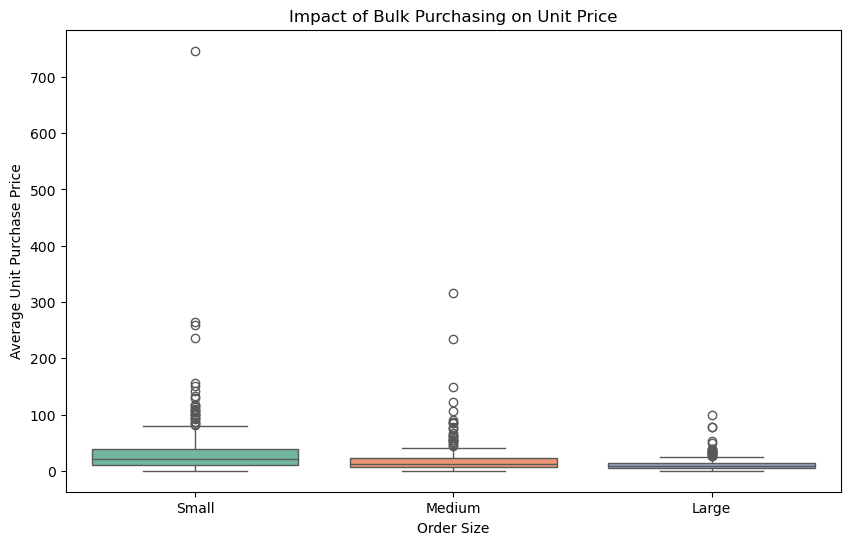

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


Therefore as bulk price increases, unit price decreases hence motivating vendors to make bulk purchases is important

- Vendors buying in bulk (Large Order Size) get the lowest unit price($ 11.9 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~67.57% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

# Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [38]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

StockTurnover
VendorName                               
BANFI PRODUCTS CORP              0.650000
HEAVEN HILL DISTILLERIES         0.660000
SURVILLE ENTERPRISES CORP        0.666667
WILLIAM GRANT & SONS INC         0.695652
STATE WINE & SPIRITS             0.707093
VINEXTRA INC                     0.716981
SOUTHERN WINE & SPIRITS NE       0.729167
TREASURY WINE ESTATES            0.745798
E & J GALLO WINERY               0.746296
KOBRAND CORPORATION              0.750000

# How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [39]:
#df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
#print("Total unsold capital: ", format_dollars(df['UnsoldInventoryValue'].sum())) this resulted in a negative output indicating errors and data inconsistancy

df['UnsoldQuantity'] = df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']
df.loc[df['UnsoldQuantity'] < 0, 'UnsoldQuantity'] = 0
df['UnsoldInventoryValue'] = df['UnsoldQuantity'] * df['PurchasePrice']
print("Total unsold capital: ", format_dollars(df['UnsoldInventoryValue'].sum()))

Total unsold capital:  36.22K


In [40]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Display Top 10 Vendors
print(inventory_value_per_vendor.head(10))

                    VendorName UnsoldInventoryValue
28              M S WALKER INC                7.78K
37              PERFECTA WINES                7.26K
30       MARTIGNETTI COMPANIES                4.33K
47  SOUTHERN WINE & SPIRITS NE                2.41K
13    DIAGEO NORTH AMERICA INC                2.00K
56  ULTRA BEVERAGE COMPANY LLP                1.98K
48        STATE WINE & SPIRITS                1.85K
38           PERNOD RICARD USA                1.29K
2              BACARDI USA INC                1.27K
39       PINE STATE TRADING CO                895.1


# What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [41]:
# Calculate thresholds for top 25% and bottom 25% vendors by total sales dollars
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [42]:
# Get ProfitMargin values for top and low-performing vendors
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [43]:
low_vendors

357     7.320644
362    12.725996
365    14.980228
373     0.167224
394    20.000000
         ...    
676    88.107203
677    55.778894
678    96.269133
679    87.688442
680    99.114603
Name: ProfitMargin, Length: 171, dtype: float64

In [44]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (52.73, 61.42), Mean: 57.08
Low Vendors 95% CI: (46.83, 54.49), Mean: 50.66


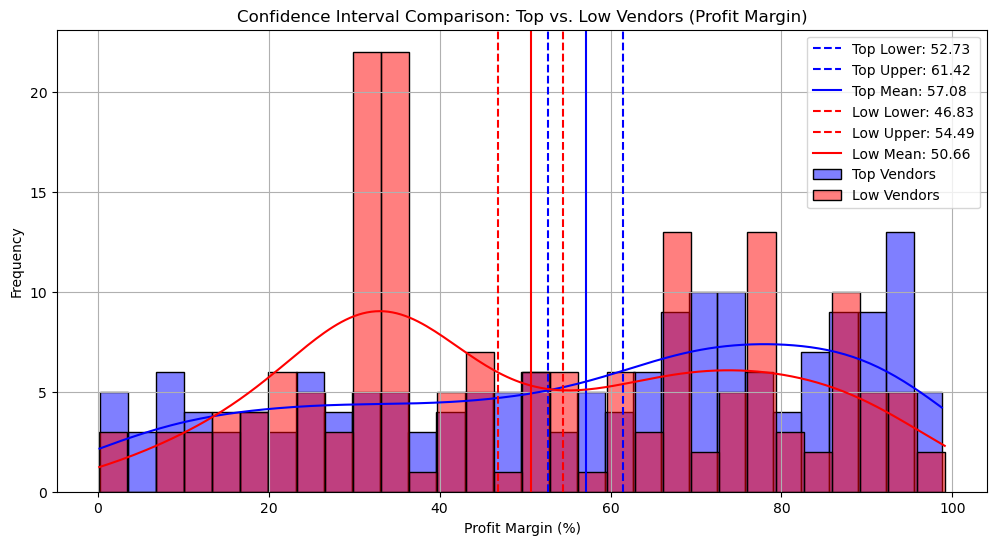

In [45]:
# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print confidence intervals and means
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
vendor_summary = df.groupby(['VendorNumber', 'VendorName']).agg({
    'TotalPurchaseDollars': 'sum',
    'TotalSalesDollars': 'sum',
    'GrossProfit': 'sum',
    'ProfitMargin': 'mean',
    'StockTurnover': 'mean',
    'SalesToPurchaseRatio': 'mean'
}).reset_index()

# Sort vendors by spend or profit margin to identify important suppliers
vendor_summary = vendor_summary.sort_values('TotalPurchaseDollars', ascending=False)
vendor_summary.head()

VendorNumber                  VendorName  TotalPurchaseDollars  TotalSalesDollars  GrossProfit  ProfitMargin  StockTurnover  SalesToPurchaseRatio
45          9165  ULTRA BEVERAGE COMPANY LLP              51492.84          132226.54     80733.70     59.888120       4.890827              7.230221
25          4425       MARTIGNETTI COMPANIES              49356.27          125884.74     76528.47     53.234497       2.549109              3.800310
46          9552              M S WALKER INC              48474.20          100939.71     52465.51     52.745373       2.615342              3.888085
51         10754              PERFECTA WINES              40428.66           62686.86     22258.20     52.188864       3.244068              4.808541
1            480             BACARDI USA INC              28829.43           49095.12     20265.69     60.424349       4.371119              6.002354

In [47]:
vendor_summary = df.groupby(['VendorNumber', 'VendorName']).agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'ProfitMargin': 'mean',
    'VendorRanking': 'mean',
}).reset_index()

vendor_summary = vendor_summary.sort_values('TotalPurchaseDollars', ascending=False)
vendor_summary['CumulativeSpend'] = vendor_summary['TotalPurchaseDollars'].cumsum()
vendor_summary['SpendPercent'] = vendor_summary['TotalPurchaseDollars'] / vendor_summary['TotalPurchaseDollars'].sum()

vendor_summary['PotentialSavings'] = vendor_summary['TotalPurchaseDollars'] * 0.05
vendor_summary['RiskScore'] = 1 / vendor_summary['VendorRanking']
vendor_summary['NetBenefit'] = vendor_summary['PotentialSavings'] - (vendor_summary['RiskScore'] * 10000)  # example weighting
vendor_summary[['VendorName', 'TotalPurchaseDollars', 'PotentialSavings', 'RiskScore', 'NetBenefit']].head(10)

VendorName  TotalPurchaseDollars  PotentialSavings  RiskScore   NetBenefit
45  ULTRA BEVERAGE COMPANY LLP              51492.84         2574.6420   0.003584  2538.799706
25       MARTIGNETTI COMPANIES              49356.27         2467.8135   0.002933  2438.480635
46              M S WALKER INC              48474.20         2423.7100   0.002898  2394.730856
51              PERFECTA WINES              40428.66         2021.4330   0.002608  1995.357957
1              BACARDI USA INC              28829.43         1441.4715   0.003715  1404.325850
14  SOUTHERN WINE & SPIRITS NE              20944.79         1047.2395   0.003396  1013.283643
53     JIM BEAM BRANDS COMPANY              14293.29          714.6645   0.003328   681.380476
24    DIAGEO NORTH AMERICA INC              14020.36          701.0180   0.002751   673.505692
3         STATE WINE & SPIRITS              11698.96          584.9480   0.003583   549.116408
55           PERNOD RICARD USA              10759.60          537.9800   0.003311   504.867417

In [52]:
# Normalize relevant fields (scaling between 0 and 1)
vendor_summary['Norm_ProfitMargin'] = (vendor_summary['ProfitMargin'] - vendor_summary['ProfitMargin'].min()) / \
                                      (vendor_summary['ProfitMargin'].max() - vendor_summary['ProfitMargin'].min())
vendor_summary['Norm_Ranking'] = (vendor_summary['VendorRanking'] - vendor_summary['VendorRanking'].min()) / \
                                 (vendor_summary['VendorRanking'].max() - vendor_summary['VendorRanking'].min())

# Composite risk: higher if profit margin is low and vendor ranking is poor
vendor_summary['EnhancedRiskScore'] = (1 - vendor_summary['Norm_ProfitMargin']) * 0.5 + \
                                      vendor_summary['Norm_Ranking'] * 0.5

# Update net benefit with enhanced risk
vendor_summary['EnhancedNetBenefit'] = vendor_summary['PotentialSavings'] - (vendor_summary['EnhancedRiskScore'] * 10000)
top_vendors = vendor_summary[['VendorName', 'TotalPurchaseDollars', 'PotentialSavings', 'EnhancedRiskScore', 'EnhancedNetBenefit']].head(10)


In [53]:
print(type(top_vendors))

<class 'pandas.core.frame.DataFrame'>


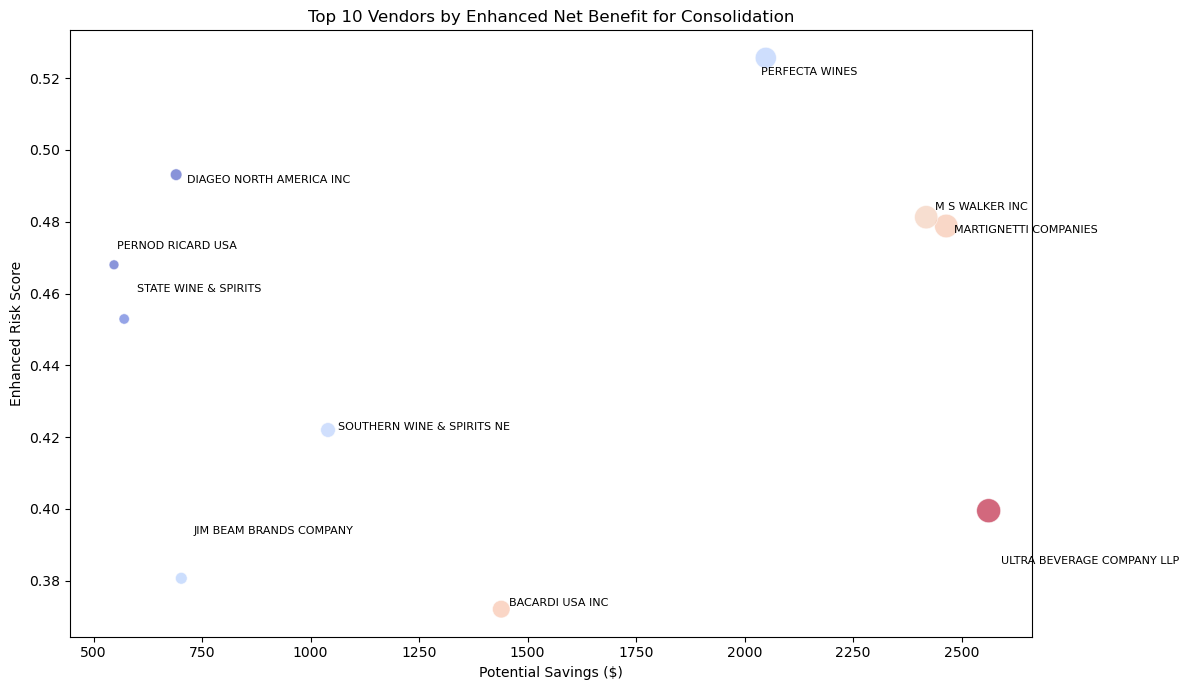

In [57]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Add jitter for better point separation
x_jitter = top_vendors['PotentialSavings'] + np.random.normal(0, 20, size=len(top_vendors))
y_jitter = top_vendors['EnhancedRiskScore'] + np.random.normal(0, 0.01, size=len(top_vendors))

sns.scatterplot(
    x=x_jitter,
    y=y_jitter,
    size=top_vendors['TotalPurchaseDollars'] / 200,
    hue=top_vendors['EnhancedNetBenefit'],
    palette='coolwarm',
    sizes=(50, 300),
    alpha=0.6,
    legend=False
)

# Slightly offset the text labels for readability
for _, row in top_vendors.iterrows():
    plt.text(row['PotentialSavings'] + 15, row['EnhancedRiskScore'] + 0.005, row['VendorName'], fontsize=8)

plt.xlabel('Potential Savings ($)')
plt.ylabel('Enhanced Risk Score')
plt.title(f"Top {len(top_vendors)} Vendors by Enhanced Net Benefit for Consolidation")

plt.tight_layout()
plt.show()

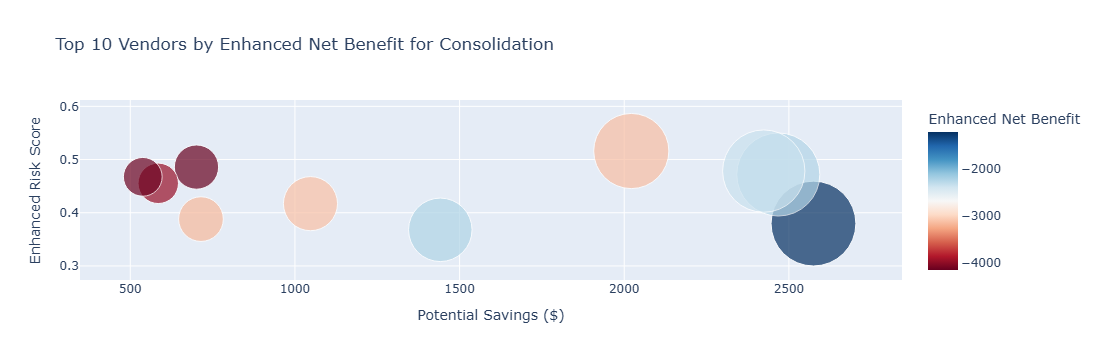

In [59]:
import plotly.express as px

top_n = len(top_vendors)  # Define top_n as number of vendors in DataFrame

fig = px.scatter(
    top_vendors,
    x='PotentialSavings',
    y='EnhancedRiskScore',
    size='TotalPurchaseDollars',
    color='EnhancedNetBenefit',
    hover_name='VendorName',
    title=f'Top {top_n} Vendors by Enhanced Net Benefit for Consolidation',
    labels={
        'PotentialSavings': 'Potential Savings ($)',
        'EnhancedRiskScore': 'Enhanced Risk Score',
        'EnhancedNetBenefit': 'Enhanced Net Benefit'
    },
    size_max=60,
    color_continuous_scale='RdBu'
)
fig.show()

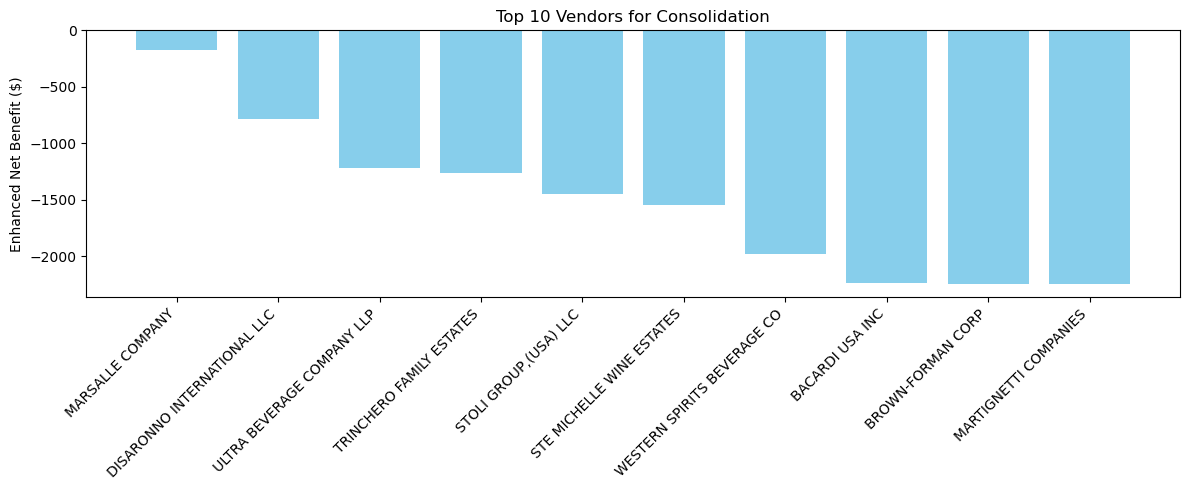

In [60]:
top_vendors = vendor_summary.sort_values('EnhancedNetBenefit', ascending=False).head(10)
plt.figure(figsize=(12,5))
plt.bar(top_vendors['VendorName'], top_vendors['EnhancedNetBenefit'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Enhanced Net Benefit ($)')
plt.title('Top 10 Vendors for Consolidation')
plt.tight_layout()
plt.show()

Vendor consolidation helps:

Reduce overall costs through economies of scale and streamlined operations.

Strengthen key supplier relationships and simplify contract management.

Minimize administrative workloads and improve efficiency.

-Top vendors have significantly higher profit margins on average than low-performing vendors, as their confidence intervals do not overlap much.
-This statistical insight supports focusing more on top-performing vendors or investigating factors causing low profit margins in lower-performing vendors.
-For Low-Performing Vendors:Their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

# Is there a significant difference in low performing and high performing vendors? hypothesis testing

The confidence intervals do not overlap—this is strong evidence that the true average profit margins of the two groups are statistically different. In simple hypothesis testing terms:

Null hypothesis (H₀): The mean profit margin for low-performing vendors is equal to that of high-performing vendors.

Alternative hypothesis (H₁): The mean profit margins are different.

If we conduct a t-test, we are very likely to find a statistically significant difference because the intervals do not intersect. This suggests that we can reject the null hypothesis, concluding there is a real difference in the average profit margins of low and high performing vendors.

In [ ]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")

 t-statistic is positive, it means the mean of the first group (e.g., top vendors) is greater than the mean of the second group (e.g., low vendors).

In [ ]:
df.to_csv('vendor_sales_summary.csv', index=False)